In [365]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as sig

x, fs = sf.read('discrete_systems_time_domain_dry_source.wav')
h, fsh = sf.read('discrete_systems_time_domain_wet_source.wav')
y = x # make y an array of same size

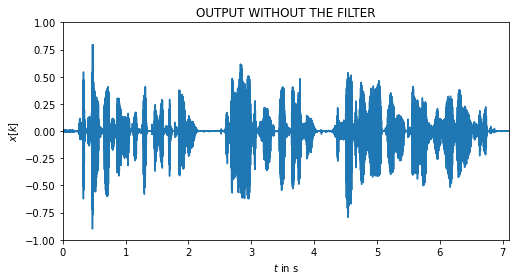

In [366]:
# OUTPUT WITHOUT THE FILTER
plt.figure(figsize=(8,4))
t = np.arange(len(x)) / fs
plt.plot(t, x)
plt.title('OUTPUT WITHOUT THE FILTER')
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x[k]$')
plt.axis([0, t[-1], -1, 1]);

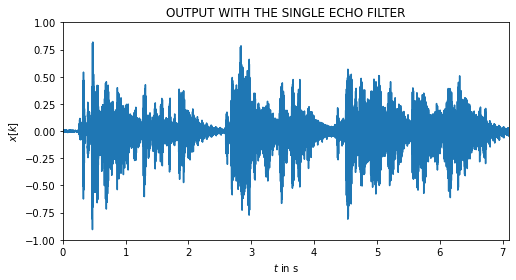

In [367]:
# OUTPUT WITH THE SINGLE ECHO FILTER
alpha = .38 # alpha scales the output farther and closer to the input
# low alpha = similar to input
R = 3500 # R makes the input signal last longer on the output
# high R = input signal lasts for longer
N = 7 # N works similarly to alpha
n = 0
for n in range(len(x)):
    k = 0
    sum = 0
    for k in range(N-1):
        sum += pow(alpha, k) * x[n - k*R]
    y[n] = sum

plt.figure(figsize=(8,4))
t = np.arange(len(y)) / fs
plt.plot(t, y)
plt.title('OUTPUT WITH THE SINGLE ECHO FILTER')
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x[k]$')
plt.axis([0, t[-1], -1, 1]);
sf.write('single_echo_filter.wav', y, fs)

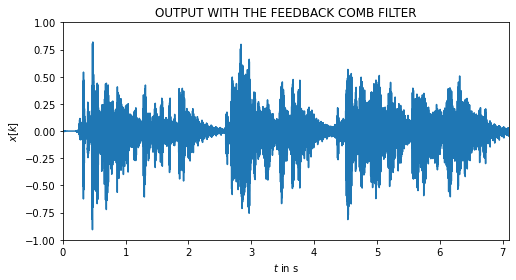

In [368]:
# OUTPUT WITH THE FEEDBACK COMB FILTER
N = 10000 # using N to mimic infinity
for n in range(N):
    y[n] = 0

alpha = .1 # alpha scales the output farther and closer to the input
# low alpha = similar to input
R = 2000 # R makes the output have more of an echo
# high R = echo is more noticeable
n = 0
for n in range(len(x)):
    y[n] = alpha * y[n - R] + x[n]
plt.figure(figsize=(8,4))
t = np.arange(len(y)) / fs
plt.plot(t, y)
plt.title('OUTPUT WITH THE FEEDBACK COMB FILTER')
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x[k]$')
plt.axis([0, t[-1], -1, 1]);
sf.write('feedback_comb_filter.wav', y, fs)

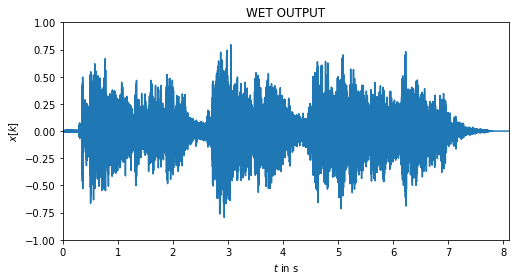

In [369]:
# WET OUTPUT
plt.figure(figsize=(8,4))
t = np.arange(len(h)) / fs
plt.plot(t, h)
plt.title('WET OUTPUT')
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x[k]$')
plt.axis([0, t[-1], -1, 1]);